In [27]:
import math
import numpy as np

def flux(r, T):
    return 3.85 * 10**41 * r**2 * (2.46* 10**4 * T + 1.57 * 100 * T**2 + 2 * T**3) * math.e**(-1.57 * 100 / T)

def recomb_rate(T):
    return 8.2 * 10**(-14) * T**(-0.8)

def stromgren(T, T_e, r, n):
    return 0.62 * (2.46 * 10**4 * T + 1.57 * 100 * T**2 + 2 * T**3)**(1/3) * math.e**(-52.33 / T) * r**(2/3) / n**(2/3) * (0.1 * T_e)**(4/15)

import math
r = 1
T = 5.78
# flux(20, 50)
print("recomb 10 and 50: ", recomb_rate(10), recomb_rate(50))
print("flux lower and upper: ", flux(7, 10), flux(10, 50))

recomb 10 and 50:  1.2996124178181128e-14 3.586227602533951e-15
flux lower and upper:  7.556898228398314e+41 3.120311004250099e+48


In [29]:
stromgren(50, 10, 20, 1)

197.70592767015452

In [31]:
N = 50  

r_values = np.linspace(7, 10, N)
T_values = np.linspace(10, 50, N)

r, T = np.meshgrid(r_values, T_values)
# S_values = []
# for i in range(N):
#     S_values.append(flux(20))

S_values = []
for i in range(N):
    temp = []
    for j in range(N):
        temp.append(flux(r_values[i], T_values[j]))
    S_values.append(temp)

n_values = []
n_row = np.linspace(1000, 1100, N)
for k in range(N):
    n_values.append(n_row)

# S, n = np.meshgrid(x_values, y_values)
n = np.array(n_values)
S = np.array(S_values)
print("shapes: ", S.shape, n.shape)


shapes:  (50, 50) (50, 50)


In [32]:
n

array([[1000.        , 1002.04081633, 1004.08163265, ..., 1095.91836735,
        1097.95918367, 1100.        ],
       [1000.        , 1002.04081633, 1004.08163265, ..., 1095.91836735,
        1097.95918367, 1100.        ],
       [1000.        , 1002.04081633, 1004.08163265, ..., 1095.91836735,
        1097.95918367, 1100.        ],
       ...,
       [1000.        , 1002.04081633, 1004.08163265, ..., 1095.91836735,
        1097.95918367, 1100.        ],
       [1000.        , 1002.04081633, 1004.08163265, ..., 1095.91836735,
        1097.95918367, 1100.        ],
       [1000.        , 1002.04081633, 1004.08163265, ..., 1095.91836735,
        1097.95918367, 1100.        ]])

<IPython.core.display.Javascript object>


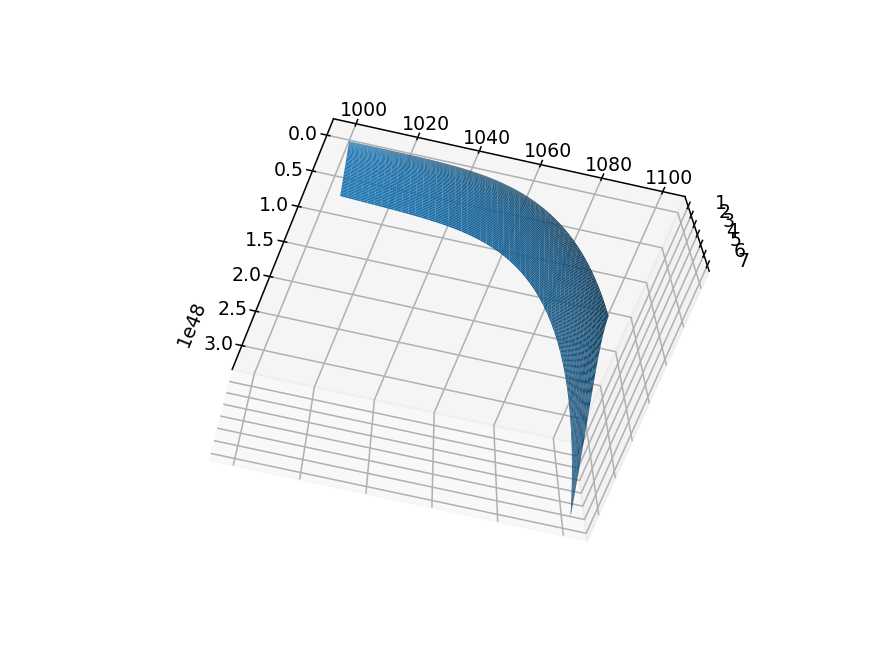

shape:  (50, 50) [[0.04899639 0.04921473 0.04943171 ... 0.05798906 0.05815626 0.05832261]
 [0.07480544 0.07513879 0.07547006 ... 0.08853504 0.08879032 0.08904428]
 [0.10784777 0.10832837 0.10880596 ... 0.12764188 0.12800991 0.12837605]
 ...
 [5.8839154  5.91013586 5.93619205 ... 6.96383454 6.98391348 7.00388924]
 [6.03965574 6.06657022 6.09331609 ... 7.14815907 7.16876947 7.18927398]
 [6.19533869 6.22294694 6.25038223 ... 7.33241568 7.35355735 7.3745904 ]]


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()

R = stromgren(T, 10000, r, n)
print("shape: ", R.shape, R)
ax = plt.axes(projection='3d')
# n = n*-1
ax.plot_surface(S, n, R);

# check for LISM density around A stars

In [2]:
# import math
# R = []
# S = [7.92 * 10**34, 1.25 * 10**35, 1.25 * 10**36, 1.25 * 10**37, 1.25 * 10**38, 1.25 * 10**39, 1.25 * 10**40, 1.25 * 10**41, 1.25 * 10**42, 1.25 * 10**43, 1.25 * 10**44, 1.25 * 10**45, 1.25 * 10**46, 1.25 * 10**47, 1.25 * 10**48, 1.25 * 10**49]
# n = [0.095, 0.822, 1.549, 2.276, 3.003, 3.73, 4.457, 5.184, 5.911, 6.638, 7.365, 8.092, 8.819, 9.546, 10.273, 11]
# beta = 8.2 * 10**-14

# for i in range(len(S)):
#     R.append(((3 * S[i]) / (4 * math.pi * n[i]**2 * beta))**(1/3))
# print(R)

[2.9452703798121748e+16, 8136194187842127.0, 1.1489511705527784e+16, 1.915230335560398e+16, 3.430038243779175e+16, 6.395334960346112e+16, 1.2236036422189762e+17, 2.3835587187469584e+17, 4.7050243734005856e+17, 9.382336789799647e+17, 1.886053536916795e+18, 3.816207092744687e+18, 7.763477321756881e+18, 1.5865541415204446e+19, 3.2549000602998407e+19, 6.699988547296862e+19]


<IPython.core.display.Javascript object>


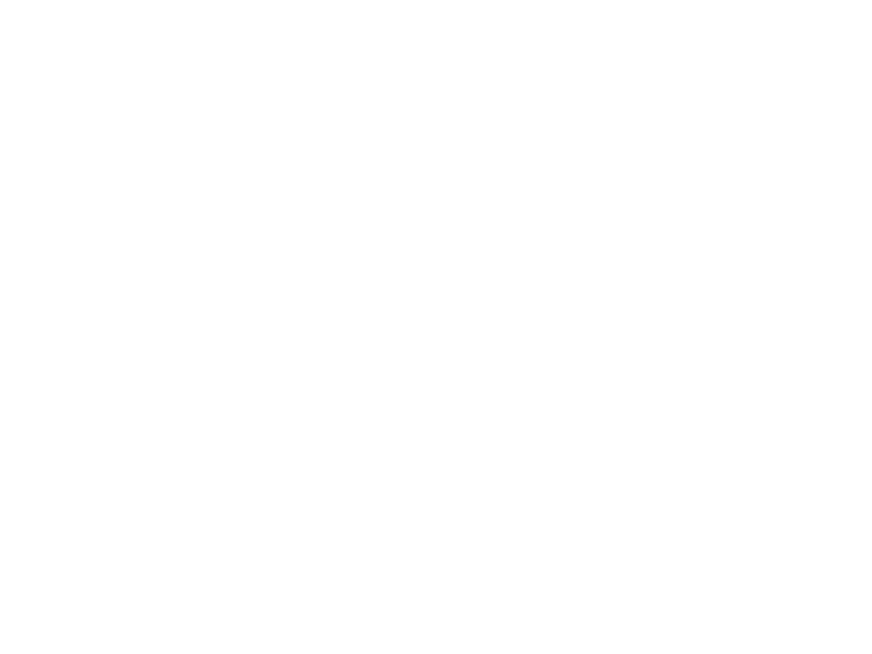

AttributeError: 'list' object has no attribute 'ndim'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# surface rather than line plot
# for radius of star and temperature of star

fig = plt.figure()
ax = plt.axes(projection='3d')

# S = 1.25⋅10**49

# R = ((3 * S) / (4 * math.pi * n**2 * beta))**(1/3)

ax.plot_surface(n, S, R, 'gray')

In [10]:
def function_z(x, y):
    return 50 - (x**2 + y**2)

In [40]:
N = 50  

x_values = np.linspace(-5, 5, N)
y_values = np.linspace(-5, 5, N)

X, Y = np.meshgrid(x_values, y_values)

print("shapes: ", x_values.shape, Y.shape)
x_values

shapes:  (50,) (50, 50)


array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# fig = plt.figure()

Z = function_z(X, Y)
print("shape: ", Z.shape)
# ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z);

shape:  (50, 50)
